# LinearRegression


## Module import

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, confusion_matrix, roc_curve, auc, f1_score, accuracy_score, precision_score, recall_score, log_loss
from sklearn.preprocessing import StandardScaler, Binarizer
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [10]:
train = pd.read_csv('../dataset_processed/train_538132.csv')
val = pd.read_csv('../dataset_processed/validation_179377.csv')
test = pd.read_csv('../dataset_processed/test_179378.csv')

In [ ]:
X_train = train.drop('depvar', axis=1)
y_train = train['depvar']

X_val = val.drop('depvar', axis=1)
y_val = val['depvar']

X_test = test.drop('depvar', axis=1)
y_test = test['depvar']

In [5]:
print(X_train.shape,X_test.shape,X_valid.shape)
print(y_train.shape,y_test.shape,y_valid.shape)

(538132, 87) (179378, 87) (179377, 87)
(538132,) (179378,) (179377,)


## Model

In [6]:
ln_reg = LinearRegression()
ln_reg.fit(X_train,y_train)

LinearRegression()

In [7]:
X_columns = ['home_ownership1', 'home_ownership2', 'home_ownership3',
       'home_ownership4', 'home_ownership5', 'verification_status1',
       'verification_status2', 'addr_state1', 'addr_state2', 'addr_state3',
       'addr_state4', 'addr_state5', 'addr_state6', 'addr_state7',
       'addr_state8', 'addr_state9', 'addr_state10', 'addr_state11',
       'addr_state12', 'addr_state13', 'addr_state14', 'addr_state15',
       'addr_state16', 'addr_state17', 'addr_state18', 'addr_state19',
       'addr_state20', 'addr_state21', 'addr_state22', 'addr_state23',
       'addr_state24', 'addr_state25', 'addr_state26', 'addr_state27',
       'addr_state28', 'addr_state29', 'addr_state30', 'addr_state31',
       'addr_state32', 'addr_state33', 'addr_state34', 'addr_state35',
       'addr_state36', 'addr_state37', 'addr_state38', 'addr_state39',
       'addr_state40', 'addr_state41', 'addr_state42', 'addr_state43',
       'addr_state44', 'addr_state45', 'addr_state46', 'addr_state47',
       'addr_state48', 'addr_state49', 'addr_state50', 'emp_length1',
       'emp_length2', 'emp_length3', 'emp_length4', 'emp_length5',
       'emp_length6', 'emp_length7', 'emp_length8', 'emp_length9',
       'emp_length10', 'emp_length11', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'pub_rec_bankruptcies', 'tax_liens', 'loan_amnt_log', 'annual_inc_log',
       'dti_log', 'delinq_2yrs_log', 'fico_average_log', 'revol_bal_log',
       'revol_util_log', 'total_acc_log', 'collections_12_mths_ex_med_log',
       'tot_coll_amt_log', 'purpose_group1', 'purpose_group2',
       'purpose_group4']

In [8]:
column_names = list(X_columns)


In [9]:
coef_ = ln_reg.coef_

column_names = list(X_columns)
coef_values =ln_reg.coef_[1:]

df_coef = pd.DataFrame({'Feature': column_names, 'Coefficient': coef_values})
df_coef

,Feature,Coefficient
0,home_ownership1,-0.000356
1,home_ownership2,-0.015475
2,home_ownership3,0.000260
3,home_ownership4,-0.000217
4,home_ownership5,-0.006837
...,...,...
81,collections_12_mths_ex_med_log,0.002121
82,tot_coll_amt_log,-0.004084
83,purpose_group1,-0.002364
84,purpose_group2,-0.012666


In [11]:
print("가중치(계수, 기울기 파라미터)",ln_reg.coef_)
print("편향(절편 파라미터 b)",ln_reg.intercept_)

print("훈련세트 점수: {:.2f}".format(ln_reg.score(X_train,y_train)))


가중치(계수, 기울기 파라미터) [ 2.68338131e-09 -3.55960919e-04 -1.54751936e-02  2.59769496e-04
 -2.17048753e-04 -6.83663827e-03 -1.49288471e-02 -4.14575805e-03
  8.18265444e-04  4.61203812e-03  2.90665571e-03  1.94300121e-03
  5.92451848e-03 -1.79575896e-03 -3.66292462e-04 -1.02504216e-03
  8.09712877e-04  6.35437297e-03 -1.75337610e-04  1.07750939e-03
  1.24111382e-03 -2.13802903e-04 -4.56159164e-04  2.30494600e-03
 -1.18608787e-03  1.65594700e-03  5.20086394e-03  1.73629128e-03
  4.82016687e-03 -2.04677593e-03  2.34865006e-03  2.59636269e-03
  2.71928803e-03  2.77096902e-03 -4.23151436e-04  3.93072933e-03
 -1.48465693e-04  1.59342209e-03 -1.78361961e-03  4.80444406e-03
  2.38256312e-03  3.33619912e-03  8.61316136e-03  2.41923734e-03
  4.18485323e-03 -2.48548722e-03  3.35474336e-03 -6.82447190e-05
 -1.39539806e-03  2.49143503e-04  3.23973172e-03  4.42940097e-03
  9.22356105e-04  4.05096541e-03 -2.10324489e-03 -2.17506132e-03
 -7.71327091e-04 -1.05588761e-03 -1.14490493e-02 -2.03439916e-02
 -1.389

### 결정계수 / 모델 성능 평가

In [13]:
ln_reg.score(X_valid,y_valid)

0.039811969247054435

In [14]:
predict = ln_reg.predict(X_valid)

In [15]:
predict

array([0.2956727 , 0.13820568, 0.18331835, ..., 0.16631782, 0.12233693,
       0.22092625])

In [16]:
#0 밑 값은 0으로 1 위 값은 1으로 
renew_predict = []
for i in predict:
    if i<0 :
        renew_predict.append(0)
    elif i>1:
        renew_predict.append(1)
    else :
        renew_predict.append(i)
        

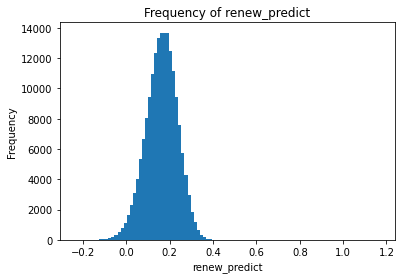

In [21]:
# Predict probabilities for new data

plt.hist(predict, bins=100)

plt.xlabel('renew_predict')
plt.ylabel('Frequency')
plt.title('Frequency of renew_predict')

#plt.savefig("image.png", dpi=300, bbox_inches='tight')

plt.show() # y_val_pred_proba의 분포 확인

## 목적 함수

### optimal threshold 선정 (threshold에 따른 목적함수 값 비교)

실제 positive = TP + FN

실제 Negative = TN + FP

정밀도: positive로 예측한 것 중에 진짜 positive인 것 -> 양성 예측도

재현율: 실제 positive 중에 맞춘 것 -> 민감도

FPR(False Positive Rate): 실제 Negative(FP + TN) 중 positive(FP)로 잘못 예측한 비율 => FP / FP+TN

TPR(True Positive Rate): 실제 Positive(TP + FN) 중 positive(TP)로 예측한 비율 => recall 재현율

1-TPR = 1 - 재현율 = 실제 Positive(TP + FN) 중 negative(FN)로 잘못 예측한 비율 => FN / TP+FN

In [74]:
#threshold_list = np.linspace(0.15835,0.15875,10) # 짝수개 값 (예시 10개)
threshold_list = np.linspace(0,1,10) # 짝수개 값 (예시 10개)

In [61]:
OPT_threshold = None
OPT_expected_loss = None
result_df = pd.DataFrame(index=['1-TPR','FPR','w1_1-TPR','w2_FPR','Expected_loss'])

def objective_func(y_pred_proba, threshold_list):
    
        
        expected_loss_list = []
        
        for i in range(len(threshold_list)):
            
            threshold = threshold_list[i]
            
            # make Binarizer(y hat)
            binarizer = Binarizer(threshold = threshold).fit(np.array(y_pred_proba).reshape(-1,1))
            custom_predict = binarizer.transform(np.array(y_pred_proba).reshape(-1,1))

            tn, fp, fn, tp = confusion_matrix(y_valid, custom_predict).ravel()
            count = [tn, fp, fn, tp]
            
            tpr_1 = fn / (fn + tp)
            fpr = fp / (fp + tn)
            w1 = 0.55
            w2 = 0.45
            print(np.round(threshold,2), 'fp',fp)
            print('threshold',np.round(threshold,2),' 일 때',tn,fp,fn,tp)
            expected_loss = w1 * tpr_1 + w2 * fpr
            
            expected_loss_list.append(expected_loss)
            
            threshold_tag = round(threshold_list[i], 4)
        
            result_df[threshold_tag] = [tpr_1, fpr, w1*tpr_1, w2*fpr, expected_loss]
            
            if i == 0:
                opt_threshold = threshold
                opt_expected_loss = expected_loss
            else:
                if opt_expected_loss > expected_loss:
                    opt_threshold = threshold
                    opt_expected_loss = expected_loss
                    
#         expected_loss_list = [round(x, 1) for x in expected_loss_list]

        print(opt_threshold)
        print(opt_expected_loss)
        
        plt.plot(threshold_list, expected_loss_list)
        plt.scatter(threshold_list, expected_loss_list)
        
        plt.xlabel('Threshold')
        plt.ylabel('Expected_Loss')
        plt.title('Expected Loss of Thresholds of LinearRegression')

        plt.savefig("LinearRegression_expected_loss_.png", dpi=300, bbox_inches='tight')
        
        plt.show()
        
        global OPT_threshold
        OPT_threshold = opt_threshold
        global OPT_expected_loss
        OPT_expected_loss = opt_expected_loss
        
        #result_df.to_csv('LinearRegression_expected_loss_.csv', index=True)
        
        return result_df

0.0 fp 147209
threshold 0.0  일 때 3093 147209 103 28972
0.11 fp 111153
threshold 0.11  일 때 39149 111153 3062 26013
0.22 fp 26770
threshold 0.22  일 때 123532 26770 18969 10106
0.33 fp 510
threshold 0.33  일 때 149792 510 28756 319
0.44 fp 1
threshold 0.44  일 때 150301 1 29075 0
0.56 fp 1
threshold 0.56  일 때 150301 1 29075 0
0.67 fp 1
threshold 0.67  일 때 150301 1 29075 0
0.78 fp 1
threshold 0.78  일 때 150301 1 29075 0
0.89 fp 1
threshold 0.89  일 때 150301 1 29075 0
1.0 fp 1
threshold 1.0  일 때 150301 1 29075 0
0.1111111111111111
0.39071159877334044


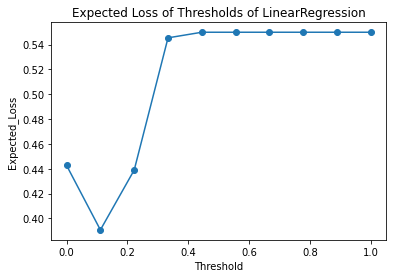

,0.0000,0.0067,0.0133,0.0200,0.0267,0.0333,0.0400,0.0467,0.0533,0.0600,0.1111,0.2222,0.3333,0.4444,0.5556,0.6667,0.7778,0.8889,1.0000
1-TPR,0.003543,0.004334,0.005469,0.007016,0.009252,0.011694,0.013895,0.017610,0.021634,0.026552,0.105314,0.652416,0.989028,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
FPR,0.979421,0.974950,0.969834,0.963700,0.956774,0.948477,0.939429,0.928258,0.916814,0.903049,0.739531,0.178108,0.003393,0.000007,0.000007,0.000007,0.000007,0.000007,0.000007
w1_1-TPR,0.001948,0.002383,0.003008,0.003859,0.005089,0.006432,0.007642,0.009685,0.011899,0.014604,0.057923,0.358829,0.543966,0.550000,0.550000,0.550000,0.550000,0.550000,0.550000
w2_FPR,0.440740,0.438728,0.436425,0.433665,0.430548,0.426815,0.422743,0.417716,0.412566,0.406372,0.332789,0.080149,0.001527,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003
Expected_loss,0.442688,0.441111,0.439433,0.437524,0.435637,0.433246,0.430385,0.427401,0.424465,0.420975,0.390712,0.438978,0.545493,0.550003,0.550003,0.550003,0.550003,0.550003,0.550003


In [75]:
objective_func(predict,threshold_list)

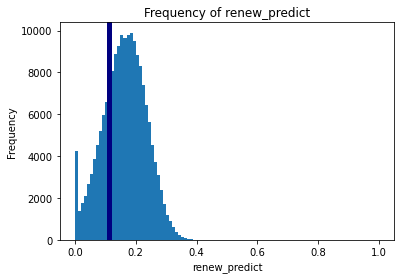

In [76]:
# Predict probabilities for new data

plt.hist(renew_predict, bins=100)
plt.axvline(x=OPT_threshold, color='navy', linewidth=5, label='Optimal Threshold')

plt.xlabel('renew_predict')
plt.ylabel('Frequency')
plt.title('Frequency of renew_predict')

plt.savefig("image.png", dpi=300, bbox_inches='tight')

plt.show() # y_val_pred_proba의 분포 확인

## Test 데이터에 대해 성능 평가

In [68]:
def test_func(y_test, y_pred_proba, opt_threshold):
        
    # make Binarizer(y hat)
    binarizer = Binarizer(threshold = opt_threshold).fit(y_pred_proba.reshape(-1,1))
    custom_predict = binarizer.transform(y_pred_proba.reshape(-1,1))

    # count 0, 1 in Binarizer(y hat)
    unique, counts = np.unique(custom_predict, return_counts=True)

    for val, count in zip(unique, counts):
        if len(unique) == 1:
            if val == 1.0:
                num_0_pred = count
                num_1_pred = 0
            elif val == 0.0:
                num_1_pred = count
                num_0_pred = 0
        if val == 1.0:
            num_0_pred = count
        elif val == 0.0:
            num_1_pred = count

    # count 0, 1 in y hat
    num_1_real = y_test.value_counts()[0]
    num_0_real = y_test.value_counts()[1]

    tn, fp, fn, tp = confusion_matrix(y_test, custom_predict).ravel()
    count = [tn, fp, fn, tp]
    tn_, fp_, fn_, tp_ = [round(x/sum(count)*100, 1) for x in count]

    accuracy = round((tp+tn)/(tp+tn+fp+fn),4)
    precision = round(tp/(tp+fp),4)
    recall = round(tp/(tp+fn),4)
    f1 = round(2*(precision*recall)/(precision+recall),4)
    
    result_df = pd.DataFrame(index=['1_real','1_pred','0_real','0_pred','tn', 'fp', 'fn', 'tp', 'tn_%', 'fp_%', 'fn_%', 'tp_%', 'Accuracy', 'Precision', 'Recall', 'F1 score'])

    result_df['result'] = [num_1_real, num_1_pred, num_0_real, num_0_pred, tn, fp, fn, tp, tn_, fp_, fn_, tp_, accuracy, precision, recall, f1]

    labels = ['TN','FP','FN','TP']


    # 혼동 행렬 시각화
    labels = ['Positive', 'Negative']
    cm = [[tp, fn], [fp, tn]]

    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax, fmt='g', cmap='Blues')
    ax.set_xlabel('Predicted Class')
    ax.set_ylabel('Acutual Class')
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
    ax.set_title('%s Confusion Matrix'%(model_name))
    
    ax.text(0.45, 1.40, 'FP', fontsize=12, color='red')
    ax.text(1.45, 1.40, 'TN', fontsize=12, color='red')
    ax.text(0.45, 0.40, 'TP', fontsize=12, color='red')
    ax.text(1.45, 0.40, 'FN', fontsize=12, color='red')
    
    #plt.savefig("%s_Confusion_Matrix_%s.png"%(model_name, datetime.datetime.now().strftime("%m%d%H%M%S")), dpi=300, bbox_inches='tight')
    plt.show()
    
    #result_df.T.to_csv('%s_test.csv'%(model_name), index=True)

    return result_df.T

In [72]:
def test_objective_func(y_test, y_pred_proba, threshold):
    
        result_df = pd.DataFrame(index=['1-TPR','FPR','w1_1-TPR','w2_FPR','Expected_loss'])
            
        # make Binarizer(y hat)
        binarizer = Binarizer(threshold = threshold).fit(y_pred_proba.reshape(-1,1))
        custom_predict = binarizer.transform(y_pred_proba.reshape(-1,1))

        tn, fp, fn, tp = confusion_matrix(y_test, custom_predict).ravel()
        count = [tn, fp, fn, tp]

        tpr_1 = fn / (fn + tp)
        fpr = fp / (fp + tn)
        w1 = 0.55
        w2 = 0.45

        expected_loss = w1 * tpr_1 + w2 * fpr

        result_df[threshold] = [tpr_1, fpr, w1*tpr_1, w2*fpr, expected_loss]

        print(expected_loss)
        
        #result_df.T.to_csv('%s_test_expected_loss_%s.csv'%(model_name, datetime.datetime.now().strftime("%m%d%H%M%S")), float_format='%.6f', index=True)
        
        return result_df

In [32]:
predict_test = ln_reg.predict(X_test)

In [77]:
renew_ = []
for i in predict_test :
    if i<=0:
        renew_.append(0)
    else:
        renew_.append(i)

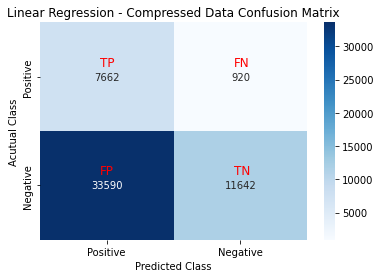

,1_real,1_pred,0_real,0_pred,tn,fp,fn,tp,tn_%,fp_%,fn_%,tp_%,Accuracy,Precision,Recall,F1 score
result,45232.0,12562.0,8582.0,41252.0,11642.0,33590.0,920.0,7662.0,21.6,62.4,1.7,14.2,0.3587,0.1857,0.8928,0.3075


In [78]:
test_func(y_test, predict_test, OPT_threshold)

In [79]:
test_objective_func(y_test, predict_test, OPT_threshold)

0.39313774647572675


,0.111111
1-TPR,0.107201
FPR,0.742616
w1_1-TPR,0.058961
w2_FPR,0.334177
Expected_loss,0.393138


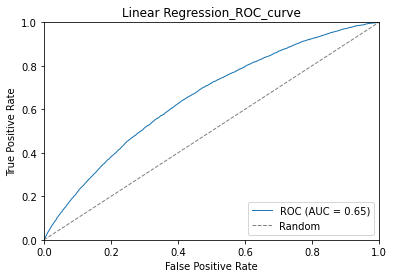

In [80]:
# Generate ROC curve and AUC score for the test set
from sklearn.metrics import roc_curve,auc
fpr, tpr, thresholds = roc_curve(y_test, predict_test)
roc_auc = auc(fpr, tpr)
model_name = 'Linear Regression'
# Plot the ROC curve
plt.plot(fpr, tpr, lw=1, label='ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], '--', color='gray', lw=1, label='Random')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('%s_ROC_curve'%(model_name))
plt.legend(loc='lower right')


#plt.savefig("%s_ROC_curve_%s.png"), dpi=300, bbox_inches='tight')
plt.show()

## 차원 축소 데이터로 진행

## 데이터 불러오기

In [37]:
compressed_train= pd.read_csv('/content/drive/MyDrive/Bigdatafintech/data/train_compressed.csv')
compressed_test = pd.read_csv('/content/drive/MyDrive/Bigdatafintech/data/test_compressed.csv')
compressed_valid = pd.read_csv('/content/drive/MyDrive/Bigdatafintech/data/validation_compressed.csv')


In [38]:
print(compressed_train.shape)

(538132, 22)


In [39]:
compressed_train.drop(['Unnamed: 0'],axis = 1,inplace =True)
compressed_test.drop(['Unnamed: 0'],axis = 1,inplace =True)
compressed_valid.drop(['Unnamed: 0'],axis = 1,inplace =True)

In [40]:
X_train_compressed ,y_train_compressed  = compressed_train.drop(['depvar'],axis=1),compressed_train['depvar']
X_test_compressed ,y_test_compressed  = compressed_test.drop(['depvar'],axis=1),compressed_test['depvar']
X_valid_compressed ,y_valid_compressed  = compressed_valid.drop(['depvar'],axis=1),compressed_valid['depvar']

In [85]:
print(X_train_compressed.shape,y_train_compressed.shape)
print(X_test_compressed.shape,y_test_compressed.shape)
print(X_valid_compressed.shape,y_valid_compressed.shape)

(538132, 20) (538132,)
(179378, 20) (179378,)
(179377, 20) (179377,)


## 차원 축소 데이터로 Train

In [42]:
ln_compress_reg = LinearRegression()
ln_compress_reg.fit(X_train_compressed,y_train_compressed)

LinearRegression()

In [43]:
ln_compress_reg.score(X_train_compressed,y_train_compressed)

0.004197720595549903

In [44]:
ln_compress_reg.score(X_valid_compressed,y_valid_compressed)

0.004229177908607329

In [45]:
ln_compress_reg.coef_

array([ 0.00401876,  0.00047104,  0.00301023,  0.00068327,  0.00065005,
       -0.00493787, -0.00212831,  0.00440386,  0.01816939, -0.00125884,
       -0.00252324,  0.00368601, -0.0109936 ,  0.00389476, -0.00998543,
       -0.01434571,  0.01228585, -0.00414513, -0.00871777,  0.01551318])

In [86]:
predict_compress = ln_compress_reg.predict(X_valid_compressed)

In [87]:
predict_compress

array([0.18154057, 0.17018782, 0.17936705, ..., 0.15838887, 0.147259  ,
       0.16214397])

0.0 fp 150302
threshold 0.0  일 때 0 150302 0 29075
0.11 fp 147644
threshold 0.11  일 때 2658 147644 400 28675
0.22 fp 1142
threshold 0.22  일 때 149160 1142 28813 262
0.33 fp 152
threshold 0.33  일 때 150150 152 29048 27
0.44 fp 36
threshold 0.44  일 때 150266 36 29072 3
0.56 fp 0
threshold 0.56  일 때 150302 0 29075 0
0.67 fp 0
threshold 0.67  일 때 150302 0 29075 0
0.78 fp 0
threshold 0.78  일 때 150302 0 29075 0
0.89 fp 0
threshold 0.89  일 때 150302 0 29075 0
1.0 fp 0
threshold 1.0  일 때 150302 0 29075 0
0.1111111111111111
0.4496086600674071


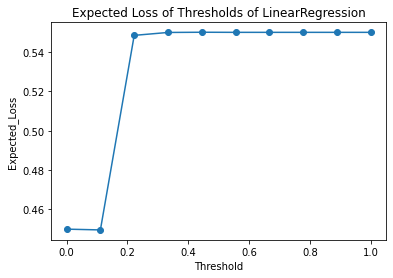

,0.0000,0.0067,0.0133,0.0200,0.0267,0.0333,0.0400,0.0467,0.0533,0.0600,0.1111,0.2222,0.3333,0.4444,0.5556,0.6667,0.7778,0.8889,1.0000
1-TPR,0.00,0.004334,0.005469,0.007016,0.009252,0.011694,0.013895,0.017610,0.021634,0.026552,0.013758,0.990989,0.999071,0.999897,1.00,1.00,1.00,1.00,1.00
FPR,1.00,0.974950,0.969834,0.963700,0.956774,0.948477,0.939429,0.928258,0.916814,0.903049,0.982316,0.007598,0.001011,0.000240,0.00,0.00,0.00,0.00,0.00
w1_1-TPR,0.00,0.002383,0.003008,0.003859,0.005089,0.006432,0.007642,0.009685,0.011899,0.014604,0.007567,0.545044,0.549489,0.549943,0.55,0.55,0.55,0.55,0.55
w2_FPR,0.45,0.438728,0.436425,0.433665,0.430548,0.426815,0.422743,0.417716,0.412566,0.406372,0.442042,0.003419,0.000455,0.000108,0.00,0.00,0.00,0.00,0.00
Expected_loss,0.45,0.441111,0.439433,0.437524,0.435637,0.433246,0.430385,0.427401,0.424465,0.420975,0.449609,0.548463,0.549944,0.550051,0.55,0.55,0.55,0.55,0.55


In [88]:
threshold_list = np.linspace(0,1,10) 
objective_func(predict_compress,threshold_list)

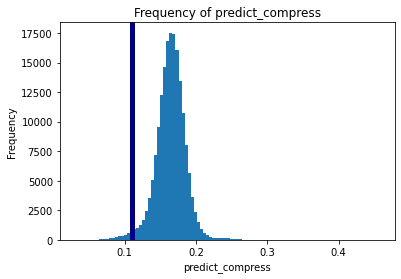

In [89]:
# Predict probabilities for new data

plt.hist(predict_compress, bins=100)

plt.xlabel('predict_compress')
plt.ylabel('Frequency')
plt.title('Frequency of predict_compress')
plt.axvline(x=OPT_threshold, color='navy', linewidth=5, label='Optimal Threshold')

plt.savefig("image.png", dpi=300, bbox_inches='tight')

plt.show() # y_val_pred_proba의 분포 확인

In [52]:
renew_compress = []
for i in predict_compress :
    if i<OPT_threshold:
        renew_compress.append(0)
    else:
        renew_compress.append(1)

## 차원 축소 Test 데이터에 대하여 성능 평가


## test 데이터로 예측 진행

In [91]:
predict_test_compress = ln_compress_reg.predict(X_test_compressed)

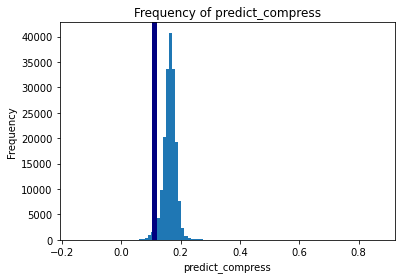

In [95]:
# Predict probabilities for new data

plt.hist(predict_test_compress, bins=100)

plt.xlabel('predict_compress')
plt.ylabel('Frequency')
plt.title('Frequency of predict_compress')
plt.axvline(x=OPT_threshold, color='navy', linewidth=5, label='Optimal Threshold')

plt.savefig("image.png", dpi=300, bbox_inches='tight')

plt.show() # y_val_pred_proba의 분포 확인

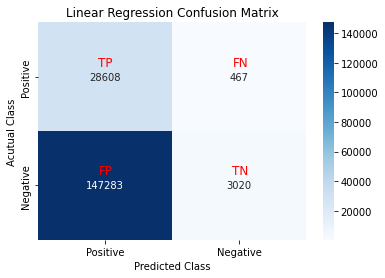

,1_real,1_pred,0_real,0_pred,tn,fp,fn,tp,tn_%,fp_%,fn_%,tp_%,Accuracy,Precision,Recall,F1 score
result,150303.0,3487.0,29075.0,175891.0,3020.0,147283.0,467.0,28608.0,1.7,82.1,0.3,15.9,0.1763,0.1626,0.9839,0.2791


In [92]:
test_func(y_test_compressed, predict_test_compress, OPT_threshold)

In [93]:
test_objective_func(y_test_compressed, predict_test_compress, OPT_threshold)

0.4497923141771249


,0.111111
1-TPR,0.016062
FPR,0.979907
w1_1-TPR,0.008834
w2_FPR,0.440958
Expected_loss,0.449792


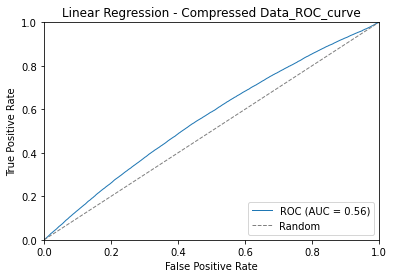

In [94]:
# Generate ROC curve and AUC score for the test set
from sklearn.metrics import roc_curve,auc
fpr, tpr, thresholds = roc_curve(y_test_compressed, predict_test_compress)
roc_auc = auc(fpr, tpr)
model_name = 'Linear Regression - Compressed Data'
# Plot the ROC curve
plt.plot(fpr, tpr, lw=1, label='ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], '--', color='gray', lw=1, label='Random')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('%s_ROC_curve'%(model_name))
plt.legend(loc='lower right')

#plt.savefig("%s_ROC_curve_%s.png"%(model_name, datetime.datetime.now().strftime("%m%d%H%M%S")), dpi=300, bbox_inches='tight')
plt.show()